In [4]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# linkage 계층형 군집분석, 덴드로그램(계층구조 나무), cluster(linkage로부터 얻은 값으로 군집 생성)
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

# 군집 방법 : AgglomerativeClustering(계층형), KMeans(K-평균),DBSCAN
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN

# 실루엣 계수 산출
from sklearn.metrics import silhouette_samples,silhouette_score

# 실루엣 계수 산출 및 시각화 라이브러리
from yellowbrick.cluster import SilhouetteVisualizer
# # 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# 분류 NN
from sklearn.neural_network import MLPClassifier

# SVM 
from sklearn.svm import SVC

# KNN
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns

In [2]:
pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 9.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
matplotlib.rc('font',family = 'Noto sans CJK JP')
#음수 표시
matplotlib.rc('axes',unicode_minus = False)
%matplotlib inline


In [6]:
df_raw = pd.read_csv("/home/piai/문서/빅데이터분석실습/2. Big Data 분석/직무능력평가.csv",encoding = 'euc-kr')
df_raw.head() # 데이터 불러오기

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [7]:
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw)
df_raw_scaled[:5]

array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

In [8]:
df_raw_y = df_raw_scaled[:,0]
df_raw_x = df_raw_scaled[:,1::]

In [9]:
Z_ward = linkage(df_raw_x, method = "ward", metric = "euclidean")
Z_average = linkage(df_raw_x, method = "average", metric = "euclidean")

Text(0, 0.5, 'Distance')

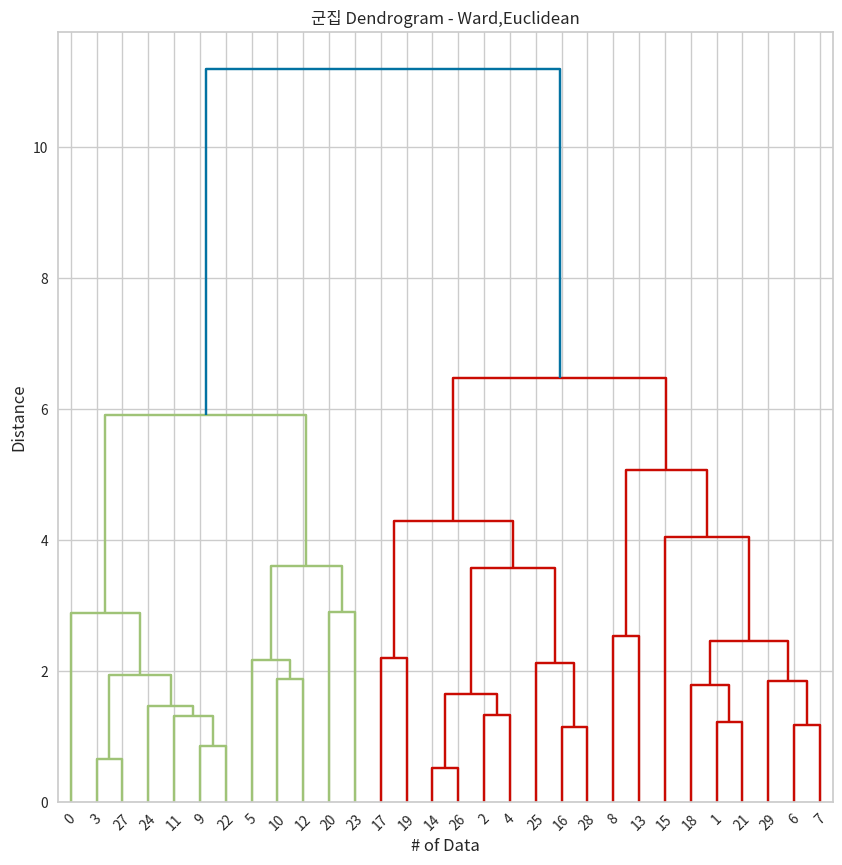

In [10]:
plt.figure(figsize = (10,10))
ax = plt.subplot(111)

dendrogram(Z_ward, leaf_font_size = 10, orientation = "top")
plt.title("군집 Dendrogram - Ward,Euclidean")
plt.xlabel("# of Data")
plt.ylabel("Distance")

In [11]:
cluster_H = fcluster(Z = Z_ward, t=5, criterion = "distance")
df_raw["cluster_H"] = cluster_H
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,cluster_H
0,43,51,30,39,61,92,45,1
1,63,64,51,54,63,73,47,5
2,71,70,68,69,76,86,48,3
3,61,63,45,47,54,84,35,1
4,81,78,56,66,71,83,47,3


In [12]:
df_summary_H = df_raw.groupby("cluster_H").agg(["min","mean","max"])
level0 = df_summary_H.columns.get_level_values(0)
level1 = df_summary_H.columns.get_level_values(1)
df_summary_H.columns = level0 + "_" + level1
df_summary_H.reset_index(inplace = True)
df_summary_H.round(3)    

,cluster_H,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
1,2,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
2,3,50,71.889,85,58,73.889,85,54,63.333,71,...,75,55,74.333,88,74,79.000,86,46,54.667,72
3,4,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
4,5,58,69.143,82,61,72.714,90,39,47.143,52,...,72,60,66.286,75,54,72.000,85,35,40.714,47


<Axes: title={'center': 'EVAL'}, xlabel='cluster_H'>

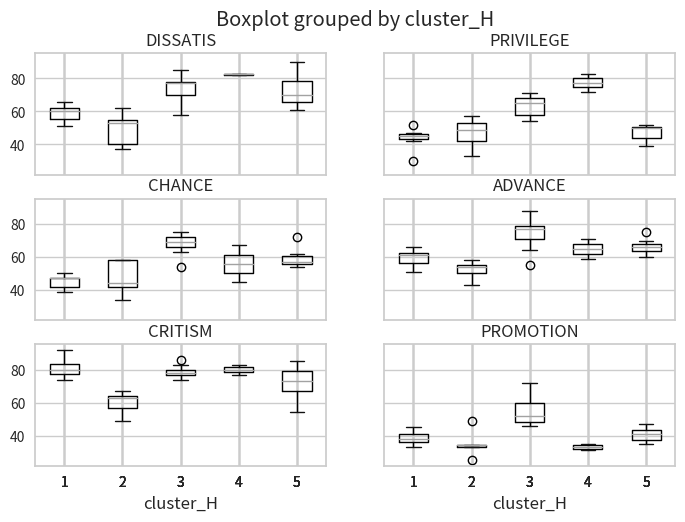

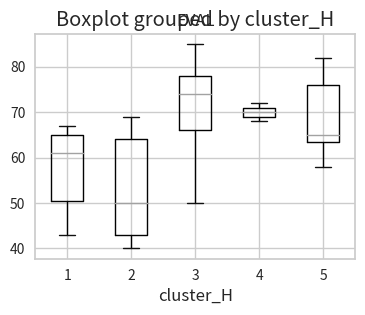

In [14]:
df_raw.boxplot(column = ["DISSATIS", "PRIVILEGE","CHANCE","ADVANCE","CRITISM","PROMOTION"], by = "cluster_H")
df_raw.boxplot(column = ["EVAL"], by = "cluster_H",figsize = (4,3))

In [19]:
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    clus_error.append(clus.inertia_)

df_error = pd.DataFrame({"NumberofCluster": cluster_range, "Error" : clus_error})
df_error.round(3)   

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/pyt

,NumberofCluster,Error
0,1,180.000
1,2,114.083
2,3,93.354
3,4,81.505
4,5,68.677
5,6,57.562
6,7,50.761
7,8,47.020
8,9,39.620
9,10,33.772


Text(0, 0.5, 'Sum of Square')

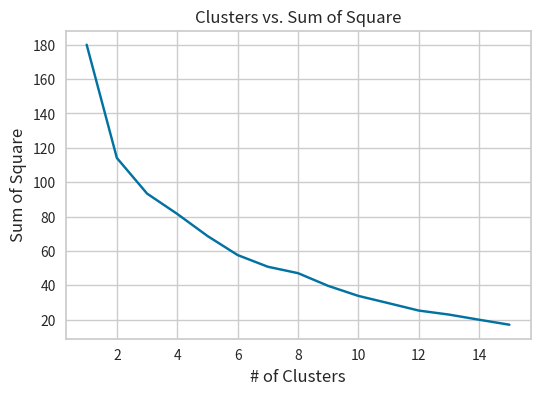

In [20]:
plt.figure(figsize = (6,4))
plt.plot(df_error["NumberofCluster"], df_error["Error"])
plt.title("Clusters vs. Sum of Square")
plt.xlabel("# of Clusters")
plt.ylabel("Sum of Square")

In [24]:
clus = KMeans(5)
clus.fit(df_raw_x)
cluster_KM = [i+1 for i in clus.labels_] 
df_raw["cluster_KM"] = cluster_KM
df_raw.head(10)

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,cluster_H,cluster_KM
0,43,51,30,39,61,92,45,1,2
1,63,64,51,54,63,73,47,5,2
2,71,70,68,69,76,86,48,3,3
3,61,63,45,47,54,84,35,1,2
4,81,78,56,66,71,83,47,3,3
5,43,55,49,44,54,49,34,2,1
6,58,67,42,56,66,68,35,5,4
7,71,75,50,55,70,66,41,5,4
8,72,82,72,67,71,83,31,4,5
9,67,61,45,47,62,80,41,1,2


In [26]:
df_summary_KM = df_raw.drop("cluster_H", axis = 1, inplace = False).\
    groupby("cluster_KM").agg(["min","mean","max"])
level0 = df_summary_KM.columns.get_level_values(0)
level1 = df_summary_KM.columns.get_level_values(1)
df_summary_KM.columns = level0 + "_" + level1
df_summary_KM.reset_index(inplace = True)
df_summary_KM.round(3)    

,cluster_KM,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,40,50.500,69,37,48.500,62,33,45.250,57,...,58,43,50.500,55,49,58.250,64,25,35.250,49
1,2,43,58.545,67,51,60.455,70,30,47.455,68,...,62,51,62.182,75,73,80.364,92,33,41.455,52
2,3,65,74.625,85,60,75.875,85,54,62.750,71,...,75,55,75.625,88,74,79.125,86,46,55.000,72
3,4,58,71.200,82,53,73.400,90,39,46.800,53,...,72,58,63.600,70,54,66.600,78,34,37.000,41
4,5,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35


<Axes: title={'center': 'EVAL'}, xlabel='cluster_KM'>

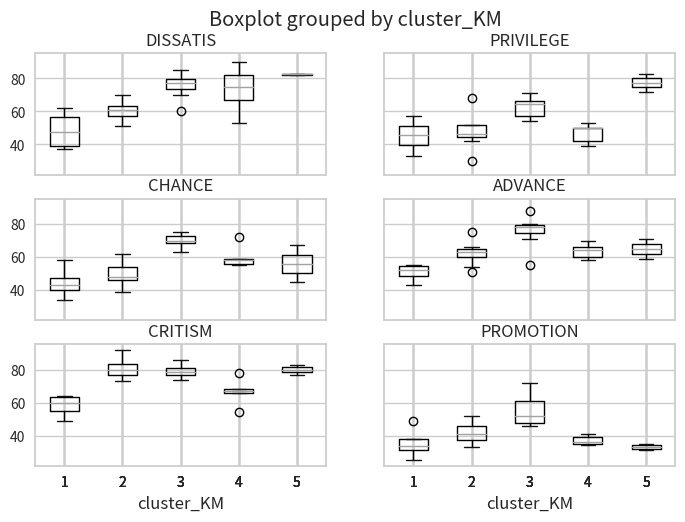

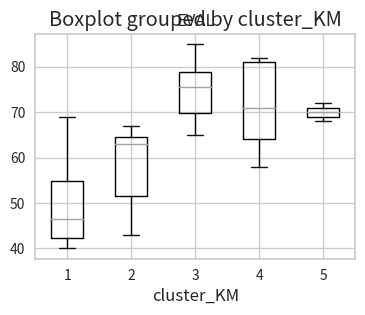

In [27]:
df_raw.boxplot(column = ["DISSATIS", "PRIVILEGE","CHANCE","ADVANCE","CRITISM","PROMOTION"], by = "cluster_KM")
df_raw.boxplot(column = ["EVAL"], by = "cluster_KM",figsize = (4,3))

In [28]:
cls_h = AgglomerativeClustering(n_clusters = 3).fit_predict(df_raw_x)
sil_score = silhouette_score(df_raw_x, cls_h, metric = 'euclidean')
print("계층형(군집 수 =3) 실루엣 계수 = ",format(round(sil_score,3)))

cls_h = AgglomerativeClustering(n_clusters = 4).fit_predict(df_raw_x)
sil_score = silhouette_score(df_raw_x, cls_h, metric = 'euclidean')
print("계층형(군집 수 =4) 실루엣 계수 = ",format(round(sil_score,3)))

계층형(군집 수 =3) 실루엣 계수 =  0.187
계층형(군집 수 =4) 실루엣 계수 =  0.198


In [33]:
cls_k = KMeans(3).fit_predict(df_raw_x)
sil_score = silhouette_score(df_raw_x,cls_k)
print("K-평균(군집 수 =3) 실루엣 계수 = ",format(round(sil_score,3)))

cls_k = KMeans(4).fit_predict(df_raw_x)
sil_score = silhouette_score(df_raw_x,cls_k)
print("K-평균(군집 수 =4) 실루엣 계수 = ",format(round(sil_score,3)))

K-평균(군집 수 =3) 실루엣 계수 =  0.248
K-평균(군집 수 =4) 실루엣 계수 =  0.193


/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


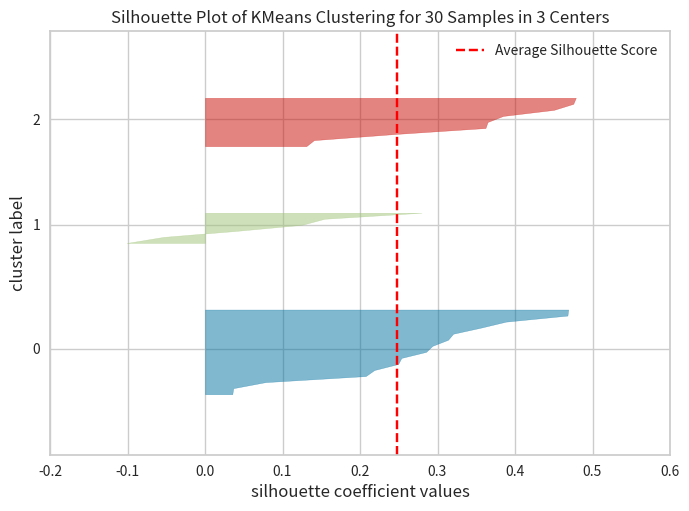

실루엣 계수 =  0.2481


In [34]:
clus = KMeans(3)
graph_sil = SilhouetteVisualizer(clus, colors = 'yellowbrick')
graph_sil.fit(df_raw_x)
graph_sil.show()
print("실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

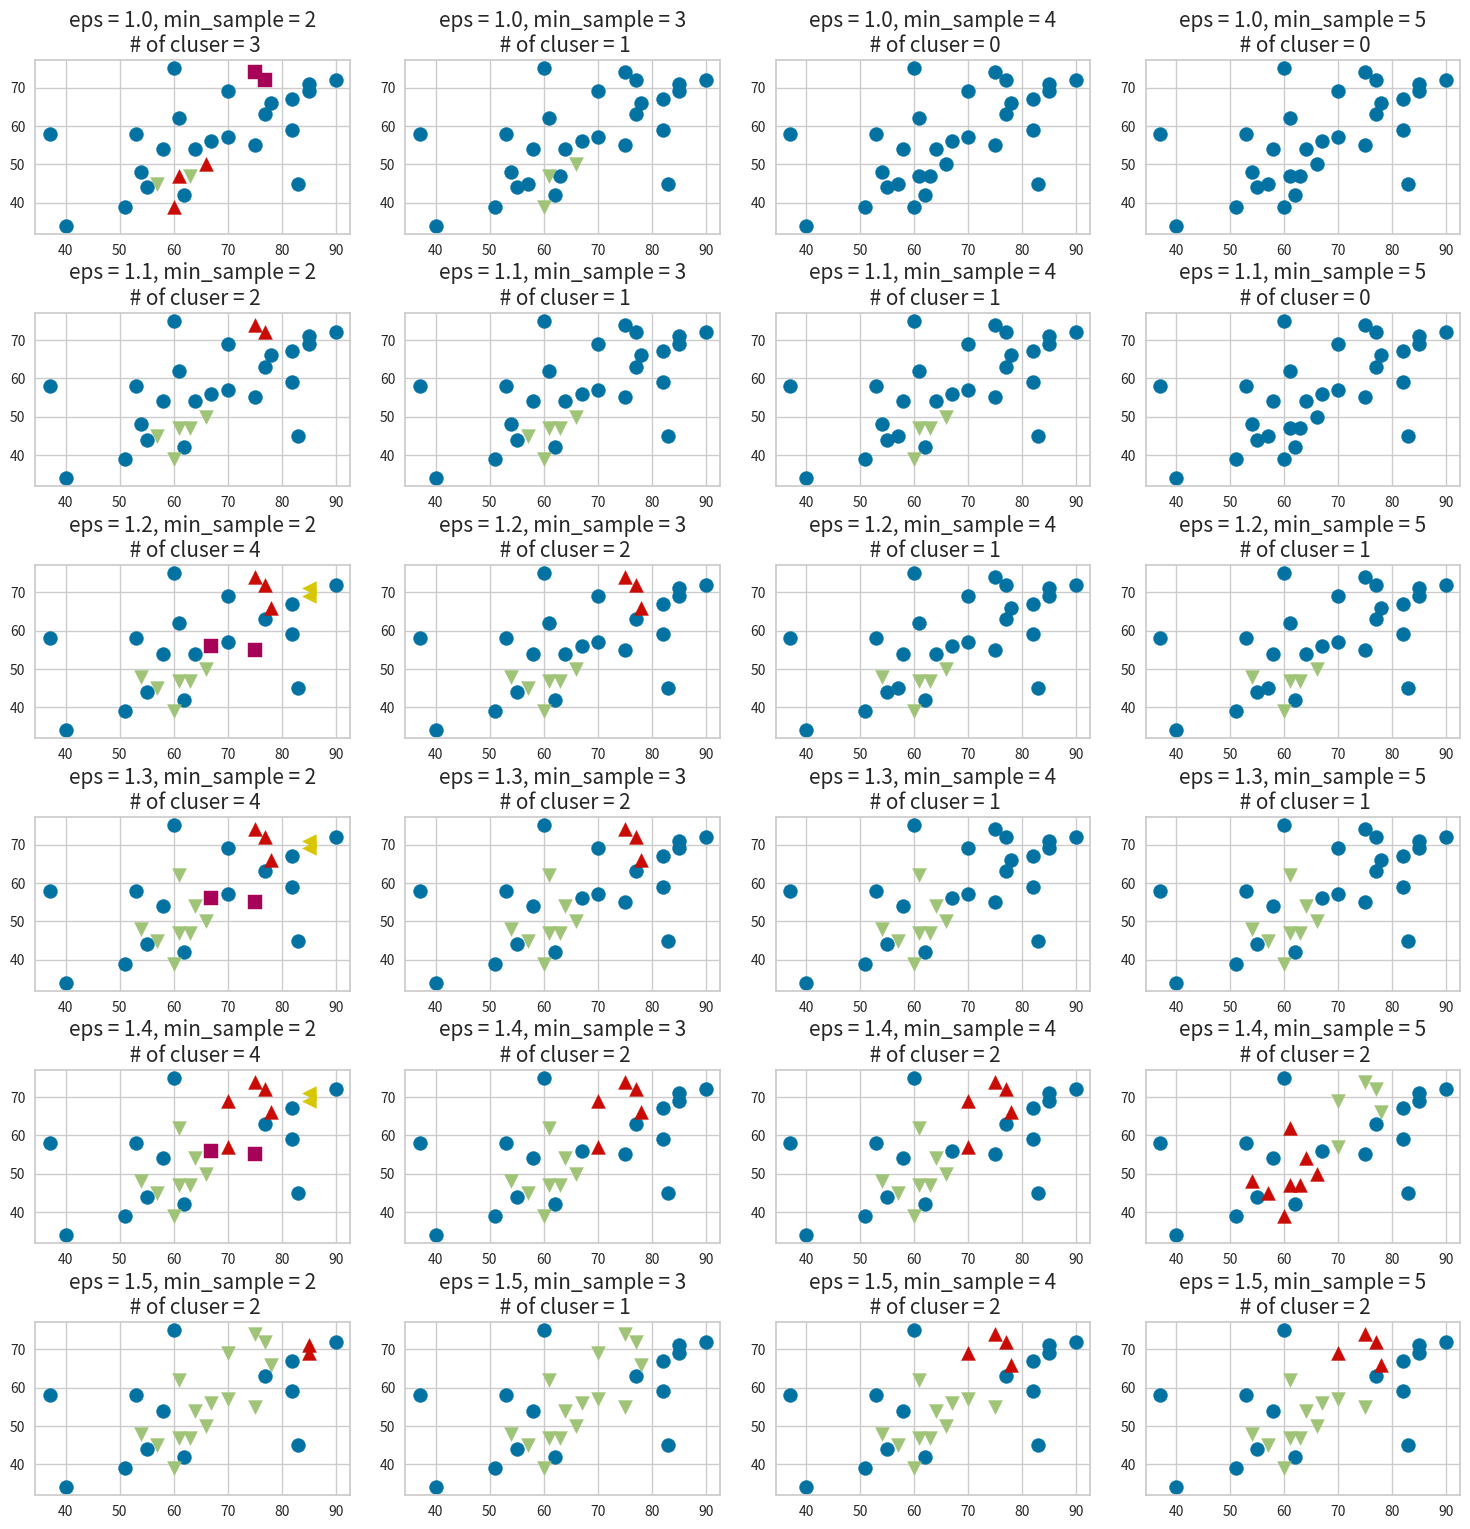

In [38]:
X = df_raw["DISSATIS"]
Y = df_raw["CHANCE"]

markers = ["o","v","^","s","<",">","p","D"]

para_eps = [k/10 for k in range(10, 16, 1)]
para_min_sample = [2,3,4,5]
fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize = (15,15))
fig.tight_layout(w_pad = 1, h_pad = 3)

for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples = min_sample, eps = eps)
        clusters = dbscan.fit_predict(df_raw_x)

        clusters = clusters + 1
        for (n_clus,clus) in enumerate(range(min(clusters),max(clusters)+1,1)):
            axes[i,j].scatter(X[clusters == clus], Y[clusters == clus], marker = markers[n_clus], s = 100)
            axes[i,j].set_title("eps = " + str(eps) + ", min_sample = " + str(min_sample) + \
                "\n # of cluser = " + str(max(clusters)), fontsize = 15)

In [39]:
dbscan = DBSCAN(eps = 1.4, min_samples = 2).fit(df_raw_x)

cluster_DB = dbscan.labels_

for (i, val) in enumerate(cluster_DB):
    if val < 0:
        cluster_DB[i] = 0
    else:
        cluster_DB[i] = cluster_DB[i] + 1
df_raw["cluster_DB"] = cluster_DB
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,cluster_H,cluster_KM,cluster_DB
0,43,51,30,39,61,92,45,1,2,0
1,63,64,51,54,63,73,47,5,2,1
2,71,70,68,69,76,86,48,3,3,2
3,61,63,45,47,54,84,35,1,2,1
4,81,78,56,66,71,83,47,3,3,2


In [40]:
df_summary_DB = df_raw.drop(["cluster_H","cluster_KM"],
                axis = 1,
                inplace = False).\
            groupby("cluster_DB").agg(["min","mean","max"])
level0 = df_summary_DB.columns.get_level_values(0)
level1 = df_summary_DB.columns.get_level_values(1)
df_summary_DB.columns = level0 + "_" + level1
df_summary_DB.reset_index(inplace = True)
df_summary_DB.round(3)          

,cluster_DB,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,0,40,61.00,82,37,63.846,90,30,54.385,83,...,75,43,60.154,88,49,70.615,92,25,41.923,72
1,1,48,60.75,67,54,60.750,66,42,47.250,52,...,62,51,60.500,66,73,78.625,84,33,39.125,47
2,2,65,74.40,81,70,74.000,78,46,56.400,68,...,74,71,76.200,80,77,81.800,86,46,47.200,49
3,3,58,64.50,71,67,71.000,75,42,46.000,50,...,56,66,68.000,70,66,67.000,68,35,38.000,41
4,4,74,79.50,85,85,85.000,85,64,67.500,71,...,71,77,78.000,79,74,76.500,79,55,59.000,63
